In [ ]:
# Install latest pre-release version of bigdl-chronos 
# Installing bigdl-chronos from pip will automatically install pyspark, bigdl, and their dependencies.
# !pip install --pre --upgrade bigdl-chronos[all]
!pip install bigdl-chronos[all]==2.0.0
!pip uninstall -y torchtext # uninstall torchtext to avoid version conflict
!pip install torchmetrics==0.7.3
exit() # restart the runtime to refresh installed pkg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 222 kB 35.6 MB/s 
     |████████████████████████████████| 9.9 MB 54.4 MB/s 
     |████████████████████████████████| 23.9 MB 1.4 MB/s 
     |████████████████████████████████| 2.2 MB 62.5 MB/s 
     |████████████████████████████████| 101.0 MB 42 kB/s 
     |████████████████████████████████| 35.4 MB 453 kB/s 
     |████████████████████████████████| 71.0 MB 250 kB/s 
     |████████████████████████████████| 218.4 MB 52 kB/s 
     |████████████████████████████████| 1.1 MB 58.5 MB/s 
     |████████████████████████████████| 65 kB 4.9 MB/s 
     |████████████████████████████████| 57.6 MB 1.2 MB/s 
     |████████████████████████████████| 85 kB 5.3 MB/s 
     |████████████████████████████████| 94 kB 4.7 MB/s 
     |████████████████████████████████| 144 kB 68.8 MB/s 
     |████████████████████████████████| 271 kB 74.7 MB/s 
     |███████████████████████████████

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# run

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Khoá luận tốt nghiệp/Dataset/final_data_6.csv")
df[['datetime', 'sun']]

,datetime,sun
0,2021-01-01 00:00:00,0.0
1,2021-01-01 00:00:00,0.0
2,2021-01-01 00:00:00,0.0
3,2021-01-01 00:00:00,0.0
4,2021-01-01 00:00:00,0.0
...,...,...
192715,2021-12-31 23:00:00,0.0
192716,2021-12-31 23:00:00,0.0
192717,2021-12-31 23:00:00,0.0
192718,2021-12-31 23:00:00,0.0


In [ ]:
df[['rhum']].value_counts()

rhum
99      15466
97       9790
98       7546
93       7392
95       7304
        ...  
40         44
39         44
34         44
35         22
38         22
Length: 64, dtype: int64

In [ ]:
import requests

url = "https://visual-crossing-weather.p.rapidapi.com/history"

querystring = {"startDateTime":"2022-01-01T00:00:00","aggregateHours":"1","location":"51.847,-8.486","endDateTime":"2022-01-01T23:00:00","unitGroup":"metric","dayStartTime":"0:00:00","contentType":"csv","dayEndTime":"23:00:00","shortColumnNames":"0", "includeAstronomy":"true"}

headers = {
	"X-RapidAPI-Host": "visual-crossing-weather.p.rapidapi.com",
	"X-RapidAPI-Key": "238f770101msh2050e838ff42255p10bc86jsn2de24c02bbb1"
}

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)

Address,Date time,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,Wind Direction,Wind Chill,Precipitation,Precipitation Cover,Snow Depth,Visibility,Cloud Cover,Sea Level Pressure,Weather Type,Latitude,Longitude,Resolved Address,Name,Info,Sunrise,Sunset,Moon Phase,Conditions
"51.847,-8.486","01/01/2022 00:00:00",11.8,11.8,11.8,9.1,83.41,,36.7,55.5,170.0,,0.8,,,13.5,46.5,1004.2,"Mist, Sky Coverage Decreasing",51.847,-8.486,"51.847,-8.486","51.847,-8.486","","2022-01-01T08:41:24Z","2022-01-01T16:33:53Z",0.98,"Rain, Partially cloudy"
"51.847,-8.486","01/01/2022 01:00:00",12.0,12.0,12.0,9.1,82.46,,35.5,57.6,170.0,,0.0,,,13.5,88.7,1003.2,"Mist",51.847,-8.486,"51.847,-8.486","51.847,-8.486","","2022-01-01T08:41:24Z","2022-01-01T16:33:53Z",0.98,"Overcast"
"51.847,-8.486","01/01/2022 02:00:00",12.0,12.0,12.0,9.9,86.95,,39.1,64.8,170.0,,0.0,,,13.5,85.2,1002.0,"Mist",51.847,-8.486,"51.847,-8.486","51.847,-8.486","","2022-01-01T08:41:

In [ ]:
f = open('file.csv', "w")
f.write(response.text)
f.close()

In [ ]:
data = pd.read_csv('/content/file.csv')
data

,Address,Date time,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,...,Weather Type,Latitude,Longitude,Resolved Address,Name,Info,Sunrise,Sunset,Moon Phase,Conditions
0,"51.847,-8.486",01/01/2022 00:00:00,11.8,11.8,11.8,9.1,83.41,NaN,36.7,55.5,...,"Mist, Sky Coverage Decreasing",51.847,-8.486,"51.847,-8.486","51.847,-8.486",NaN,2022-01-01T08:41:24Z,2022-01-01T16:33:53Z,0.98,"Rain, Partially cloudy"
1,"51.847,-8.486",01/01/2022 01:00:00,12.0,12.0,12.0,9.1,82.46,NaN,35.5,57.6,...,Mist,51.847,-8.486,"51.847,-8.486","51.847,-8.486",NaN,2022-01-01T08:41:24Z,2022-01-01T16:33:53Z,0.98,Overcast
2,"51.847,-8.486",01/01/2022 02:00:00,12.0,12.0,12.0,9.9,86.95,NaN,39.1,64.8,...,Mist,51.847,-8.486,"51.847,-8.486","51.847,-8.486",NaN,2022-01-01T08:41:24Z,2022-01-01T16:33:53Z,0.98,Overcast
3,"51.847,-8.486",01/01/2022 03:00:00,12.8,12.8,12.8,9.9,82.37,NaN,40.3,64.8,...,"Drizzle, Mist",51.847,-8.486,"51.847,-8.486","51.847,-8.486",NaN,2022-01-01T08:41:24Z,2022-01-01T16:33:53Z,0.98,Overcast
4,"51.847,-8.486",01/01/2022 04:00:00,12.9,12.9,12.9,10.8,87.24,NaN,46.6,72.3,...,"Mist, Rain, Light Rain",51.847,-8.486,"51.847,-8.486","51.847,-8.486",NaN,2022-01-01T08:41:24Z,2022-01-01T16:33:53Z,0.99,Overcast
5,"51.847,-8.486",01/01/2022 05:00:00,12.0,12.0,12.0,11.8,98.62,NaN,51.3,76.0,...,"Drizzle, Mist, Light Rain",51.847,-8.486,"51.847,-8.486","51.847,-8.486",NaN,2022-01-01T08:41:24Z,2022-01-01T16:33:53Z,0.99,Overcast
6,"51.847,-8.486",01/01/2022 06:00:00,11.0,11.0,11.0,9.1,87.89,NaN,42.7,93.6,...,"Drizzle, Mist, Sky Coverage Increasing",51.847,-8.486,"51.847,-8.486","51.847,-8.486",NaN,2022-01-01T08:41:24Z,2022-01-01T16:33:53Z,0.99,Overcast
7,"51.847,-8.486",01/01/2022 07:00:00,11.0,11.0,11.0,9.1,88.09,NaN,33.1,68.4,...,Mist,51.847,-8.486,"51.847,-8.486","51.847,-8.486",NaN,2022-01-01T08:41:24Z,2022-01-01T16:33:53Z,0.99,Overcast
8,"51.847,-8.486",01/01/2022 08:00:00,11.0,11.0,11.0,9.1,88.09,NaN,34.4,57.6,...,"Mist, Light Drizzle",51.847,-8.486,"51.847,-8.486","51.847,-8.486",NaN,2022-01-01T08:41:24Z,2022-01-01T16:33:53Z,0.99,Overcast
9,"51.847,-8.486",01/01/2022 09:00:00,11.0,11.0,11.0,9.1,88.09,NaN,35.5,NaN,...,"Drizzle, Mist",51.847,-8.486,"51.847,-8.486","51.847,-8.486",NaN,2022-01-01T08:41:24Z,2022-01-01T16:33:53Z,0.99,Overcast


In [ ]:
data['Date time'] = data['Date time'].astype('datetime64')
data['Sunrise'] = data['Sunrise'].astype('datetime64')
data['Sunset'] = data['Sunset'].astype('datetime64')


In [ ]:
for i in range(24):
  if data['Date time'][i] > data['Sunrise'][i] and data['Date time'][i] < data['Sunset'][i]:
    print(True)
  else:
    print(False)

False
False
False
False
False
False
False
False
False
True
True
True
True
True
True
True
True
False
False
False
False
False
False
False


In [ ]:
s = pd.to_datetime(data['Date time'])
m = (s - s.dt.floor('D')).between(pd.Timedelta('12:00:00'), pd.Timedelta('18:00:00'))

data.loc[m]

,Address,Date time,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,...,Weather Type,Latitude,Longitude,Resolved Address,Name,Info,Sunrise,Sunset,Moon Phase,Conditions
12,"51.847,-8.486",2022-01-01 12:00:00,11.1,11.1,11.1,9.9,92.47,NaN,36.7,57.6,...,"Mist, Sky Coverage Increasing",51.847,-8.486,"51.847,-8.486","51.847,-8.486",NaN,2022-01-01T08:41:24Z,2022-01-01T16:33:53Z,0.99,Partially cloudy
13,"51.847,-8.486",2022-01-01 13:00:00,11.0,11.0,11.0,10.0,93.55,NaN,36.7,57.6,...,Mist,51.847,-8.486,"51.847,-8.486","51.847,-8.486",NaN,2022-01-01T08:41:24Z,2022-01-01T16:33:53Z,0.99,Partially cloudy
14,"51.847,-8.486",2022-01-01 14:00:00,11.2,11.2,11.2,9.8,91.62,NaN,40.3,64.8,...,Mist,51.847,-8.486,"51.847,-8.486","51.847,-8.486",NaN,2022-01-01T08:41:24Z,2022-01-01T16:33:53Z,0.99,Partially cloudy
15,"51.847,-8.486",2022-01-01 15:00:00,11.0,11.0,11.0,9.7,91.82,NaN,39.1,61.2,...,Mist,51.847,-8.486,"51.847,-8.486","51.847,-8.486",NaN,2022-01-01T08:41:24Z,2022-01-01T16:33:53Z,1.00,Partially cloudy
16,"51.847,-8.486",2022-01-01 16:00:00,10.8,10.8,10.8,9.0,88.50,NaN,33.1,NaN,...,Mist,51.847,-8.486,"51.847,-8.486","51.847,-8.486",NaN,2022-01-01T08:41:24Z,2022-01-01T16:33:53Z,1.00,Partially cloudy
17,"51.847,-8.486",2022-01-01 17:00:00,10.8,10.8,10.8,9.0,88.70,NaN,28.1,NaN,...,Mist,51.847,-8.486,"51.847,-8.486","51.847,-8.486",NaN,2022-01-01T08:41:24Z,2022-01-01T16:33:53Z,1.00,Partially cloudy
18,"51.847,-8.486",2022-01-01 18:00:00,10.0,10.0,10.0,9.1,93.94,NaN,23.2,NaN,...,"Mist, Light Drizzle",51.847,-8.486,"51.847,-8.486","51.847,-8.486",NaN,2022-01-01T08:41:24Z,2022-01-01T16:33:53Z,1.00,Partially cloudy


In [ ]:
data['Date time'].between_time('08:41', '16:33')

TypeError: ignored

In [ ]:
df[df['datetime']=='2021-01-01 10:00:00'].sun

220    1.0
221    1.0
222    1.0
223    1.0
224    1.0
225    1.0
226    1.0
227    1.0
228    1.0
229    1.0
230    1.0
231    1.0
232    1.0
233    1.0
234    1.0
235    1.0
236    1.0
237    1.0
238    1.0
239    1.0
240    1.0
241    1.0
Name: sun, dtype: float64

# run 2

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Khoá luận tốt nghiệp/Dataset/final_data_6.csv")
df
# import necesary libraries and modules
from bigdl.orca import init_orca_context, stop_orca_context
from bigdl.orca import OrcaContext
from bigdl.chronos.data import TSDataset
from sklearn.preprocessing import MinMaxScaler
from bigdl.chronos.forecaster.lstm_forecaster import LSTMForecaster
from bigdl.orca.automl.metrics import Evaluator
# stop_orca_context()

# recommended to set it to True when running bigdl-chronos in Jupyter notebook 
OrcaContext.log_output = True # (this will display terminal's stdout and stderr in the Jupyter notebook).

init_orca_context(cluster_mode="local", cores=4, init_ray_on_spark=True)


# create list feature
time_ft = ['weekend']
location_ft = ['lat', 'long']
link_ft = ['20223', 'GL1', '1255', '1405', '1404', '1403', 'GL2', '1271','1253', '1401', 'GL3', '1283', '1258', '1256']
weather_ft = ['rhum', 'sun', 'vis']

ft = [
      time_ft, location_ft, link_ft, weather_ft,
      time_ft+location_ft, time_ft+link_ft,  time_ft+weather_ft, location_ft+link_ft, location_ft+weather_ft, link_ft+weather_ft,
      time_ft+location_ft+link_ft, time_ft+location_ft+weather_ft, time_ft+link_ft+weather_ft, location_ft+link_ft+weather_ft,
      time_ft+location_ft+link_ft+weather_ft
    ]

# ft2 = [
#       location_ft, link_ft, weather_ft,
#       location_ft+link_ft, location_ft+weather_ft, link_ft+weather_ft,
#       location_ft+link_ft+weather_ft
#     ]

ft2 = [
      link_ft, location_ft+link_ft+weather_ft,  location_ft+link_ft, link_ft+weather_ft, location_ft, weather_ft, location_ft+weather_ft, 
    ]

len(ft2)


# components to make a evaluate table
dict_scores={}
ft_text = [
      'None', 'time_ft', 'location_ft', 'link_ft', 'weather_ft',
      'time_ft + location_ft', 'time_ft + link_ft',  'time_ft + weather_ft', 'location_ft + link_ft', 'location_ft + weather_ft', 'link_ft + weather_ft',
      'time_ft + location_ft + link_ft', 'time_ft + location_ft + weather_ft', 'time_ft + link_ft + weather_ft', 'location_ft + link_ft + weather_ft',
      'time_ft + location_ft + link_ft + weather_ft']

# ft_text2 = [
#       'None', 'location_ft', 'link_ft', 'weather_ft',
#       'location_ft + link_ft', 'location_ft + weather_ft', 'link_ft + weather_ft',
#       'location_ft + link_ft + weather_ft'
#       ]

ft_text2 = [
      'None', 'link_ft', 'location_ft+link_ft+weather_ft', 'location_ft+link_ft', 'link_ft+weather_ft', 'location_ft', 'weather_ft', 'location_ft+weather_ft' 
      ]
list_rmse=[]
list_smape=[]
# list_best_config=[]

# EVALUATE with Sklearn metric
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
def s_mape(a, f):
  return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f)))
    # return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)

# rmse = mean_squared_error(y_test_unscale.reshape(-1), y_pred_unscale.reshape(-1), squared=False)
# mae = mean_absolute_error(y_test_unscale.reshape(-1), y_pred_unscale.reshape(-1))
# mape = mean_absolute_percentage_error(y_test_unscale.reshape(-1), y_pred_unscale.reshape(-1))

# print("Kết quả dự đoán trên tập test đã cắt 50 dòng mỗi sensor:")
# print('RMSE:', rmse)
# print('MAE:', mae)
# print('MAPE:', mape)
# print('sMAPE:', smape)

#loop for features
for i in range(8):
  if (i == 0):
    tsdata_train, tsdata_val, tsdata_test = TSDataset.from_pandas(df, dt_col="datetime", id_col="id", target_col="value", with_split=True, val_ratio=0.1, test_ratio=0.1)
  else:
    tsdata_train, tsdata_val, tsdata_test = TSDataset.from_pandas(df, dt_col="datetime", id_col="id", target_col="value", extra_feature_col=ft2[i-1] , with_split=True, val_ratio=0.1, test_ratio=0.1)

  
  minmax_scaler = MinMaxScaler()

  for tsdata in [tsdata_train, tsdata_val, tsdata_test]:
      tsdata.scale(minmax_scaler, fit=(tsdata is tsdata_train)).roll(lookback=50, horizon=1)

  X_train, y_train = tsdata_train.to_numpy()
  X_val, y_val = tsdata_val.to_numpy()
  X_test, y_test = tsdata_test.to_numpy()
  X_train.shape, y_train.shape, X_test.shape, y_test.shape

 

  feature_dim = X_train.shape[-1]
  target_dim = 1
  # hidden_dim = 10
  learning_rate = 0.01
  batch_size = 128
  epochs = 3

  # build model
  forecaster = LSTMForecaster(past_seq_len=X_train.shape[1],
                              input_feature_num=feature_dim,
                              output_feature_num=target_dim,
                              hidden_dim=32,
                              lr=learning_rate, layer_num=2, dropout=0.2, 
                              seed=17
                              )

  forecaster.fit(data=(X_train, y_train), batch_size=batch_size, epochs=epochs)

  y_pred = forecaster.predict(X_test)
  y_pred_unscale = tsdata_test.unscale_numpy(y_pred)
  y_test_unscale = tsdata_test.unscale_numpy(y_test)

  # evaluate with mean_squared_error


  rmse =  Evaluator.evaluate("rmse", y_test_unscale, y_pred_unscale, multioutput='raw_values')[0][0]
  # smape =  Evaluator.evaluate("smape", y_test_unscale, y_pred_unscale, multioutput='raw_values')[0][0]
  smape = s_mape(y_test_unscale.reshape(-1), y_pred_unscale.reshape(-1))

  list_rmse.append(rmse)
  list_smape.append(smape)

  # if len(list_rmse) >=3:
  #   if list_rmse[2] > min(list_rmse):
  #     break

  
  print(ft_text2[i])
  print("rmse: " + str(rmse) + "\nsmape: " + str(smape))
  print("\n") 
  # print("root mean_squared error is", Evaluator.evaluate(["rmse", "mape"], y_test_unscale, y_pred_unscale, multioutput='raw_values'))
  
  # get best config
  # best_config = auto_estimator.get_best_config()
  # list_best_config.append(best_config)

# Create evaluate table
dict_scores['Extra_feature_col'] = ft_text2
dict_scores['RMSE Score'] = list_rmse
dict_scores['sMAPE Score'] = list_smape
# dict_scores['Best config'] = list_best_config
evaluate_table = pd.DataFrame.from_dict(dict_scores)
evaluate_table



/usr/local/lib/python3.7/dist-packages/bigdl/dllib/nncontext.py:377: UserWarning: Setting log_output takes no effect after the context has been initialized. You need to set log_output before initializing the context (e.g., before calling init_orca_context, init_nncontext, etc.)
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/bigdl/orca/common.py:233: Warning: Use an existing SparkContext, cluster_mode is determined by the existing SparkContext
  "cluster_mode is determined by the existing SparkContext", Warning)


Initializing orca context
2022-06-13 15:17:40,377 Thread-3 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2022-06-13 15:17:40,380 Thread-3 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2022-06-13 15:17:40,381 Thread-3 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2022-06-13 15:17:40,382 Thread-3 WARN The bufferSize is set to 4000 but bufferedIo is false: false
22-06-13 15:17:40 [Thread-3] INFO  Engine$:121 - Auto detect executor number and executor cores number
22-06-13 15:17:40 [Thread-3] INFO  Engine$:123 - Executor number is 1 and executor cores number is 4
22-06-13 15:17:40 [Thread-3] INFO  ThreadPool$:95 - Set mkl threads to 1 on thread 16
2022-06-13 15:17:40 WARN  SparkContext:66 - Using an existing SparkContext; some configuration may not take effect.
22-06-13 15:17:40 [Thread-3] INFO  Engine$:446 - Find existing spark context. Checking the spark conf...


Global seed set to 17
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type      | Params
------------------------------------
0 | model | LSTMModel | 13.0 K
1 | loss  | MSELoss   | 0     
------------------------------------
13.0 K    Trainable params
0         Non-trainable params
13.0 K    Total params
0.052     Tot

Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 17


Training: -1it [00:00, ?it/s]

None
rmse: 131.52618488920567
smape: 0.23956143677104674




Global seed set to 17
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type      | Params
------------------------------------
0 | model | LSTMModel | 14.8 K
1 | loss  | MSELoss   | 0     
------------------------------------
14.8 K    Trainable params
0         Non-trainable params
14.8 K    Total params
0.059     Tot

Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 17


Training: -1it [00:00, ?it/s]

link_ft
rmse: 135.55643088941378
smape: 0.2737474168527438




Global seed set to 17
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type      | Params
------------------------------------
0 | model | LSTMModel | 15.4 K
1 | loss  | MSELoss   | 0     
------------------------------------
15.4 K    Trainable params
0         Non-trainable params
15.4 K    Total params
0.062     Tot

Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 17


Training: -1it [00:00, ?it/s]

location_ft+link_ft+weather_ft
rmse: 121.68792861087846
smape: 0.21307325077194264




Global seed set to 17
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type      | Params
------------------------------------
0 | model | LSTMModel | 15.0 K
1 | loss  | MSELoss   | 0     
------------------------------------
15.0 K    Trainable params
0         Non-trainable params
15.0 K    Total params
0.060     Tot

Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 17


Training: -1it [00:00, ?it/s]

location_ft+link_ft
rmse: 124.37704430341945
smape: 0.27931301396377445




Global seed set to 17
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type      | Params
------------------------------------
0 | model | LSTMModel | 15.1 K
1 | loss  | MSELoss   | 0     
------------------------------------
15.1 K    Trainable params
0         Non-trainable params
15.1 K    Total params
0.061     Tot

Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 17


Training: -1it [00:00, ?it/s]

link_ft+weather_ft
rmse: 125.50046116102514
smape: 0.24605745775111032




Global seed set to 17
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type      | Params
------------------------------------
0 | model | LSTMModel | 13.2 K
1 | loss  | MSELoss   | 0     
------------------------------------
13.2 K    Trainable params
0         Non-trainable params
13.2 K    Total params
0.053     Tot

Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 17


Training: -1it [00:00, ?it/s]

location_ft
rmse: 129.48802230764417
smape: 0.21941781533271554




Global seed set to 17
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type      | Params
------------------------------------
0 | model | LSTMModel | 13.3 K
1 | loss  | MSELoss   | 0     
------------------------------------
13.3 K    Trainable params
0         Non-trainable params
13.3 K    Total params
0.053     Tot

Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 17


Training: -1it [00:00, ?it/s]

weather_ft
rmse: 131.51773961757894
smape: 0.2803540889003444




Global seed set to 17
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type      | Params
------------------------------------
0 | model | LSTMModel | 13.6 K
1 | loss  | MSELoss   | 0     
------------------------------------
13.6 K    Trainable params
0         Non-trainable params
13.6 K    Total params
0.054     Tot

Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 17


Training: -1it [00:00, ?it/s]

location_ft+weather_ft
rmse: 127.8865457823612
smape: 0.35865776431766105




,Extra_feature_col,RMSE Score,sMAPE Score
0,None,131.526185,0.239561
1,link_ft,135.556431,0.273747
2,location_ft+link_ft+weather_ft,121.687929,0.213073
3,location_ft+link_ft,124.377044,0.279313
4,link_ft+weather_ft,125.500461,0.246057
5,location_ft,129.488022,0.219418
6,weather_ft,131.517740,0.280354
7,location_ft+weather_ft,127.886546,0.358658


In [ ]:
y_pred_unscale.shape

(18172, 1, 1)

In [ ]:
y_test_unscale

array([[[3395.]],

       [[3174.]],

       [[3312.]],

       ...,

       [[  69.]],

       [[  52.]],

       [[  43.]]])

In [ ]:
test = tsdata_test.unscale().to_pandas()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# for i in list_id:
#   data = result[result['id']==i]
rmse = mean_squared_error(y_test_unscale.reshape(-1), y_pred_unscale.reshape(-1), squared=False)
mae = mean_absolute_error(y_test_unscale.reshape(-1), y_pred_unscale.reshape(-1))

  # rmse_ls.append(rmse)
  # mae_ls.append(mae)
print(rmse)
print(mae)

129.75261127639337
86.51108288623584


# run full variables

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Khoá luận tốt nghiệp/Dataset/final_data_6.csv")
df
# import necesary libraries and modules
from bigdl.orca import init_orca_context, stop_orca_context
from bigdl.orca import OrcaContext
from bigdl.chronos.data import TSDataset
from sklearn.preprocessing import MinMaxScaler
from bigdl.chronos.forecaster.lstm_forecaster import LSTMForecaster
from bigdl.orca.automl.metrics import Evaluator
# stop_orca_context()

# recommended to set it to True when running bigdl-chronos in Jupyter notebook 
OrcaContext.log_output = True # (this will display terminal's stdout and stderr in the Jupyter notebook).

init_orca_context(cluster_mode="local", cores=4, init_ray_on_spark=True)


# create list feature
time_ft = ['weekend']
location_ft = ['lat', 'long']
link_ft = ['20223', 'GL1', '1255', '1405', '1404', '1403', 'GL2', '1271','1253', '1401', 'GL3', '1283', '1258', '1256']
weather_ft = ['rhum', 'sun', 'vis']


# components to make a evaluate table
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
def s_mape(a, f):
  return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f)))

#loop for features
best_rmse = 99999999
best_smape = 99999999
seed = -1
for i in range(1,1000):
  tsdata_train, tsdata_val, tsdata_test = TSDataset.from_pandas(df, dt_col="datetime", id_col="id", target_col="value", extra_feature_col=location_ft+link_ft+weather_ft , with_split=True, val_ratio=0.1, test_ratio=0.1)


  minmax_scaler = MinMaxScaler()

  for tsdata in [tsdata_train, tsdata_val, tsdata_test]:
      tsdata.scale(minmax_scaler, fit=(tsdata is tsdata_train)).roll(lookback=50, horizon=1)

  X_train, y_train = tsdata_train.to_numpy()
  X_val, y_val = tsdata_val.to_numpy()
  X_test, y_test = tsdata_test.to_numpy()
  X_train.shape, y_train.shape, X_test.shape, y_test.shape



  feature_dim = X_train.shape[-1]
  target_dim = 1
  # hidden_dim = 10
  learning_rate = 0.01
  batch_size = 128
  epochs = 3

  # build model
  forecaster = LSTMForecaster(past_seq_len=X_train.shape[1],
                              input_feature_num=feature_dim,
                              output_feature_num=target_dim,
                              hidden_dim=32,
                              lr=learning_rate, layer_num=2, dropout=0.2,
                              seed=i)

  forecaster.fit(data=(X_train, y_train), batch_size=batch_size, epochs=epochs)

  y_pred = forecaster.predict(X_test)
  y_pred_unscale = tsdata_test.unscale_numpy(y_pred)
  y_test_unscale = tsdata_test.unscale_numpy(y_test)

  rmse =  Evaluator.evaluate("rmse", y_test_unscale, y_pred_unscale, multioutput='raw_values')[0][0]
  # smape =  Evaluator.evaluate("smape", y_test_unscale, y_pred_unscale, multioutput='raw_values')[0][0]
  smape = s_mape(y_test_unscale.reshape(-1), y_pred_unscale.reshape(-1))
  print("Current - rmse: " + str(rmse) + "\tsmape: " + str(smape))
  if best_rmse > rmse and best_smape > smape:
    best_rmse = rmse
    best_smape = smape
    seed = i
  print("Seed=" + str(seed) + " Best - rmse: " + str(best_rmse) + "\tsmape: " + str(best_smape))
  

  if rmse < 122.488968 and smape < 0.22:
    print("FINALLLLLLLLLL\nrmse: " + str(rmse) + "\nsmape: " + str(smape))
    break

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/bigdl/chronos/forecaster/__init__.py:36: UserWarning: Please install `tensorflow<2.0.0` to use MTNetForecaster.
  warnings.warn("Please install `tensorflow<2.0.0` to use MTNetForecaster.")
/usr/local/lib/python3.7/dist-packages/bigdl/chronos/forecaster/__init__.py:41: UserWarning: Please install `prophet` to use ProphetForecaster.
  warnings.warn("Please install `prophet` to use ProphetForecaster.")
/usr/local/lib/python3.7/dist-packages/bigdl/chronos/forecaster/__init__.py:46: UserWarning: Please install `pmdarima` to use ARIMAForecaster.
  warnings.warn("Please install `pmdarima` to use ARIMAForecaster.")


Initializing orca context
Current pyspark location is : /usr/local/lib/python3.7/dist-packages/pyspark/__init__.py
Start to getOrCreate SparkContext
pyspark_submit_args is:  --driver-class-path /usr/local/lib/python3.7/dist-packages/bigdl/share/orca/lib/bigdl-orca-spark_2.4.6-2.0.0-jar-with-dependencies.jar:/usr/local/lib/python3.7/dist-packages/bigdl/share/dllib/lib/bigdl-dllib-spark_2.4.6-2.0.0-jar-with-dependencies.jar pyspark-shell 
[main] WARN  org.apache.hadoop.util.NativeCodeLoader  - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


2022-06-14 13:42:34,719 Thread-3 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2022-06-14 13:42:34,727 Thread-3 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2022-06-14 13:42:34,736 Thread-3 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2022-06-14 13:42:34,742 Thread-3 WARN The bufferSize is set to 4000 but bufferedIo is false: false
22-06-14 13:42:34 [Thread-3] INFO  Engine$:121 - Auto detect executor number and executor cores number
22-06-14 13:42:34 [Thread-3] INFO  Engine$:123 - Executor number is 1 and executor cores number is 4



User settings:

   KMP_AFFINITY=granularity=fine,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   OMP_NUM_THREADS=1

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_HAND_THREAD=false
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_FORKJOIN_FRAMES=true
   KMP_FORKJOIN_FRAMES_MODE=3
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_ITT_PREPARE_DELAY=0
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
  

22-06-14 13:42:36 [Thread-3] INFO  ThreadPool$:95 - Set mkl threads to 1 on thread 16
[Thread-3] WARN  org.apache.spark.SparkContext  - Using an existing SparkContext; some configuration may not take effect.
22-06-14 13:42:36 [Thread-3] INFO  Engine$:446 - Find existing spark context. Checking the spark conf...
cls.getname: com.intel.analytics.bigdl.dllib.utils.python.api.Sample
BigDLBasePickler registering: bigdl.dllib.utils.common  Sample
cls.getname: com.intel.analytics.bigdl.dllib.utils.python.api.EvaluatedResult
BigDLBasePickler registering: bigdl.dllib.utils.common  EvaluatedResult
cls.getname: com.intel.analytics.bigdl.dllib.utils.python.api.JTensor
BigDLBasePickler registering: bigdl.dllib.utils.common  JTensor
cls.getname: com.intel.analytics.bigdl.dllib.utils.python.api.JActivity
BigDLBasePickler registering: bigdl.dllib.utils.common  JActivity
Successfully got a SparkContext


2022-06-14 13:42:41,595	INFO services.py:1340 -- View the Ray dashboard at http://172.28.0.2:8265


{'node_ip_address': '172.28.0.2', 'raylet_ip_address': '172.28.0.2', 'redis_address': '172.28.0.2:6379', 'object_store_address': '/tmp/ray/session_2022-06-14_13-42-37_509704_1655/sockets/plasma_store', 'raylet_socket_name': '/tmp/ray/session_2022-06-14_13-42-37_509704_1655/sockets/raylet', 'webui_url': '172.28.0.2:8265', 'session_dir': '/tmp/ray/session_2022-06-14_13-42-37_509704_1655', 'metrics_export_port': 63627, 'node_id': '5e565ead60a0954e4a155c565ac55421915d36573466c7ea0de2d51a'}


Global seed set to 1
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type      | Params
------------------------------------
0 | model | LSTMModel | 15.4 K
1 | loss  | MSELoss   | 0     
------------------------------------
15.4 K    Trainable params
0         Non-trainable params
15.4 K    Total params
0.062     Tota

Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 1


Training: -1it [00:00, ?it/s]

Current - rmse: 126.19517994316332	smape: 0.2851772906902159
Seed=1 Best - rmse: 126.19517994316332	smape: 0.2851772906902159


Global seed set to 2
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type      | Params
------------------------------------
0 | model | LSTMModel | 15.4 K
1 | loss  | MSELoss   | 0     
------------------------------------
15.4 K    Trainable params
0         Non-trainable params
15.4 K    Total params
0.062     Tota

Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 2


Training: -1it [00:00, ?it/s]

2022-06-14 13:44:01,547	WARNING worker.py:1245 -- (ip=172.28.0.2) The agent on node 1a9cfaf0f2bf failed to be restarted 5 times. There are 3 possible problems if you see this error.
  1. The dashboard might not display correct information on this node.
  2. Metrics on this node won't be reported.
  3. runtime_env APIs won't work.
Check out the `dashboard_agent.log` to see the detailed failure messages.


Current - rmse: 118.9118408575533	smape: 0.24465779161601717
Seed=2 Best - rmse: 118.9118408575533	smape: 0.24465779161601717


Global seed set to 3
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type      | Params
------------------------------------
0 | model | LSTMModel | 15.4 K
1 | loss  | MSELoss   | 0     
------------------------------------
15.4 K    Trainable params
0         Non-trainable params
15.4 K    Total params
0.062     Tota

Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 3


Training: -1it [00:00, ?it/s]

Current - rmse: 126.03856767196102	smape: 0.25953208199063926
Seed=2 Best - rmse: 118.9118408575533	smape: 0.24465779161601717


Global seed set to 4
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type      | Params
------------------------------------
0 | model | LSTMModel | 15.4 K
1 | loss  | MSELoss   | 0     
------------------------------------
15.4 K    Trainable params
0         Non-trainable params
15.4 K    Total params
0.062     Tota

Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 4


Training: -1it [00:00, ?it/s]

Current - rmse: 122.80887986528415	smape: 0.2225630654654437
Seed=2 Best - rmse: 118.9118408575533	smape: 0.24465779161601717


Global seed set to 5
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type      | Params
------------------------------------
0 | model | LSTMModel | 15.4 K
1 | loss  | MSELoss   | 0     
------------------------------------
15.4 K    Trainable params
0         Non-trainable params
15.4 K    Total params
0.062     Tota

Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 5


Training: -1it [00:00, ?it/s]

Current - rmse: 129.16189780216737	smape: 0.2443876931115778
Seed=2 Best - rmse: 118.9118408575533	smape: 0.24465779161601717


Global seed set to 6
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type      | Params
------------------------------------
0 | model | LSTMModel | 15.4 K
1 | loss  | MSELoss   | 0     
------------------------------------
15.4 K    Trainable params
0         Non-trainable params
15.4 K    Total params
0.062     Tota

Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 6


Training: -1it [00:00, ?it/s]

Current - rmse: 119.03048353961644	smape: 0.22633763434567136
Seed=2 Best - rmse: 118.9118408575533	smape: 0.24465779161601717


Global seed set to 7
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type      | Params
------------------------------------
0 | model | LSTMModel | 15.4 K
1 | loss  | MSELoss   | 0     
------------------------------------
15.4 K    Trainable params
0         Non-trainable params
15.4 K    Total params
0.062     Tota

Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 7


Training: -1it [00:00, ?it/s]

Current - rmse: 134.8012853266158	smape: 0.2808252972410028
Seed=2 Best - rmse: 118.9118408575533	smape: 0.24465779161601717


Global seed set to 8
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type      | Params
------------------------------------
0 | model | LSTMModel | 15.4 K
1 | loss  | MSELoss   | 0     
------------------------------------
15.4 K    Trainable params
0         Non-trainable params
15.4 K    Total params
0.062     Tota

Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 8


Training: -1it [00:00, ?it/s]

Current - rmse: 120.32418420609105	smape: 0.3219862604628754
Seed=2 Best - rmse: 118.9118408575533	smape: 0.24465779161601717


Global seed set to 9
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type      | Params
------------------------------------
0 | model | LSTMModel | 15.4 K
1 | loss  | MSELoss   | 0     
------------------------------------
15.4 K    Trainable params
0         Non-trainable params
15.4 K    Total params
0.062     Tota

Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 9


Training: -1it [00:00, ?it/s]

Current - rmse: 129.4641133965959	smape: 0.30730848839125974
Seed=2 Best - rmse: 118.9118408575533	smape: 0.24465779161601717


Global seed set to 10
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type      | Params
------------------------------------
0 | model | LSTMModel | 15.4 K
1 | loss  | MSELoss   | 0     
------------------------------------
15.4 K    Trainable params
0         Non-trainable params
15.4 K    Total params
0.062     Tot

Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 10


Training: -1it [00:00, ?it/s]

Current - rmse: 120.5921848696508	smape: 0.23647933525817438
Seed=2 Best - rmse: 118.9118408575533	smape: 0.24465779161601717


Global seed set to 11
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type      | Params
------------------------------------
0 | model | LSTMModel | 15.4 K
1 | loss  | MSELoss   | 0     
------------------------------------
15.4 K    Trainable params
0         Non-trainable params
15.4 K    Total params
0.062     Tot

Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 11


Training: -1it [00:00, ?it/s]

Current - rmse: 122.74559563654576	smape: 0.35570714559955996
Seed=2 Best - rmse: 118.9118408575533	smape: 0.24465779161601717


Global seed set to 12
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type      | Params
------------------------------------
0 | model | LSTMModel | 15.4 K
1 | loss  | MSELoss   | 0     
------------------------------------
15.4 K    Trainable params
0         Non-trainable params
15.4 K    Total params
0.062     Tot

Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 12


Training: -1it [00:00, ?it/s]

Current - rmse: 125.0718018996898	smape: 0.31520429835367864
Seed=2 Best - rmse: 118.9118408575533	smape: 0.24465779161601717


Global seed set to 13
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type      | Params
------------------------------------
0 | model | LSTMModel | 15.4 K
1 | loss  | MSELoss   | 0     
------------------------------------
15.4 K    Trainable params
0         Non-trainable params
15.4 K    Total params
0.062     Tot

Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 13


Training: -1it [00:00, ?it/s]

Current - rmse: 122.29396674204098	smape: 0.29782999230071766
Seed=2 Best - rmse: 118.9118408575533	smape: 0.24465779161601717


Global seed set to 14
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type      | Params
------------------------------------
0 | model | LSTMModel | 15.4 K
1 | loss  | MSELoss   | 0     
------------------------------------
15.4 K    Trainable params
0         Non-trainable params
15.4 K    Total params
0.062     Tot

Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 14


Training: -1it [00:00, ?it/s]

Current - rmse: 130.63421102588396	smape: 0.321386439819153
Seed=2 Best - rmse: 118.9118408575533	smape: 0.24465779161601717


Global seed set to 15
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type      | Params
------------------------------------
0 | model | LSTMModel | 15.4 K
1 | loss  | MSELoss   | 0     
------------------------------------
15.4 K    Trainable params
0         Non-trainable params
15.4 K    Total params
0.062     Tot

Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 15


Training: -1it [00:00, ?it/s]

Current - rmse: 133.3785701856019	smape: 0.2814693155086134
Seed=2 Best - rmse: 118.9118408575533	smape: 0.24465779161601717


Global seed set to 16
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type      | Params
------------------------------------
0 | model | LSTMModel | 15.4 K
1 | loss  | MSELoss   | 0     
------------------------------------
15.4 K    Trainable params
0         Non-trainable params
15.4 K    Total params
0.062     Tot

Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 16


Training: -1it [00:00, ?it/s]

Current - rmse: 132.47016171788917	smape: 0.2598105583761091
Seed=2 Best - rmse: 118.9118408575533	smape: 0.24465779161601717


Global seed set to 17
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type      | Params
------------------------------------
0 | model | LSTMModel | 15.4 K
1 | loss  | MSELoss   | 0     
------------------------------------
15.4 K    Trainable params
0         Non-trainable params
15.4 K    Total params
0.062     Tot

Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 17


Training: -1it [00:00, ?it/s]

Current - rmse: 121.68792861087846	smape: 0.21307325077194264
Seed=2 Best - rmse: 118.9118408575533	smape: 0.24465779161601717
FINALLLLLLLLLL
rmse: 121.68792861087846
smape: 0.21307325077194264


In [ ]:
rmse =  Evaluator.evaluate("rmse", y_test_unscale, y_pred_unscale, multioutput='raw_values')[0][0]
# smape =  Evaluator.evaluate("smape", y_test_unscale, y_pred_unscale, multioutput='raw_values')[0][0]
smape = s_mape(y_test_unscale.reshape(-1), y_pred_unscale.reshape(-1))
print("Current - rmse: " + str(rmse) + "\tsmape: " + str(smape))

Current - rmse: 121.68792861087846	smape: 0.21307325077194264


# So sánh độ dài dữ liệu train

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Khoá luận tốt nghiệp/Dataset/final_data_6.csv")
df
# import necesary libraries and modules
from bigdl.orca import init_orca_context, stop_orca_context
from bigdl.orca import OrcaContext
from bigdl.chronos.data import TSDataset
from sklearn.preprocessing import MinMaxScaler
from bigdl.chronos.forecaster.lstm_forecaster import LSTMForecaster
from bigdl.orca.automl.metrics import Evaluator
# stop_orca_context()

# recommended to set it to True when running bigdl-chronos in Jupyter notebook 
OrcaContext.log_output = True # (this will display terminal's stdout and stderr in the Jupyter notebook).

init_orca_context(cluster_mode="local", cores=4, init_ray_on_spark=True)


# create list feature
time_ft = ['weekend']
location_ft = ['lat', 'long']
link_ft = ['20223', 'GL1', '1255', '1405', '1404', '1403', 'GL2', '1271','1253', '1401', 'GL3', '1283', '1258', '1256']
weather_ft = ['rhum', 'sun', 'vis']


# components to make a evaluate table
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
def s_mape(a, f):
  return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f)))

#loop for features
# so sánh độ dài dữ liệu train
tsdata_train, tsdata_val, tsdata_test = TSDataset.from_pandas(df, dt_col="datetime", id_col="id", target_col="value", 
                                                              extra_feature_col=location_ft+link_ft+weather_ft , with_split=True, val_ratio=0.7, test_ratio=0.1)

# so sánh tính cập nhật dữ liệu train
_, tsdata_train, _ = TSDataset.from_pandas(df, dt_col="datetime", id_col="id", target_col="value", 
                                                              extra_feature_col=location_ft+link_ft+weather_ft , with_split=True, val_ratio=0.2, test_ratio=0.4)

tsdata_train_1, tsdata_val, tsdata_test = TSDataset.from_pandas(df, dt_col="datetime", id_col="id", target_col="value", 
                                                              extra_feature_col=location_ft+link_ft+weather_ft , with_split=True, val_ratio=0.7, test_ratio=0.1)


minmax_scaler = MinMaxScaler()

for tsdata in [tsdata_train, tsdata_val, tsdata_test]:
    tsdata.scale(minmax_scaler, fit=(tsdata is tsdata_train)).roll(lookback=50, horizon=1)

X_train, y_train = tsdata_train.to_numpy()
X_val, y_val = tsdata_val.to_numpy()
X_test, y_test = tsdata_test.to_numpy()
X_train.shape, y_train.shape, X_test.shape, y_test.shape



feature_dim = X_train.shape[-1]
target_dim = 1
# hidden_dim = 10
learning_rate = 0.01
batch_size = 128
epochs = 3

# build model
forecaster = LSTMForecaster(past_seq_len=X_train.shape[1],
                            input_feature_num=feature_dim,
                            output_feature_num=target_dim,
                            hidden_dim=32,
                            lr=learning_rate, layer_num=2, dropout=0.2,
                            seed=18
                            )

forecaster.fit(data=(X_train, y_train), batch_size=batch_size, epochs=epochs)

y_pred = forecaster.predict(X_test)
y_pred_unscale = tsdata_test.unscale_numpy(y_pred)
y_test_unscale = tsdata_test.unscale_numpy(y_test)

# evaluate with mean_squared_error

rmse =  Evaluator.evaluate("rmse", y_test_unscale, y_pred_unscale, multioutput='raw_values')[0][0]
# smape =  Evaluator.evaluate("smape", y_test_unscale, y_pred_unscale, multioutput='raw_values')[0][0]
smape = s_mape(y_test_unscale.reshape(-1), y_pred_unscale.reshape(-1))
print("Current - rmse: " + str(rmse) + "\tsmape: " + str(smape))

/usr/local/lib/python3.7/dist-packages/bigdl/dllib/nncontext.py:377: UserWarning: Setting log_output takes no effect after the context has been initialized. You need to set log_output before initializing the context (e.g., before calling init_orca_context, init_nncontext, etc.)
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/bigdl/orca/common.py:233: Warning: Use an existing SparkContext, cluster_mode is determined by the existing SparkContext
  "cluster_mode is determined by the existing SparkContext", Warning)


Initializing orca context
2022-06-14 14:33:38,687 Thread-3 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2022-06-14 14:33:38,689 Thread-3 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2022-06-14 14:33:38,693 Thread-3 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2022-06-14 14:33:38,700 Thread-3 WARN The bufferSize is set to 4000 but bufferedIo is false: false
22-06-14 14:33:38 [Thread-3] INFO  Engine$:121 - Auto detect executor number and executor cores number
22-06-14 14:33:38 [Thread-3] INFO  Engine$:123 - Executor number is 1 and executor cores number is 4
22-06-14 14:33:38 [Thread-3] INFO  ThreadPool$:95 - Set mkl threads to 1 on thread 16
[Thread-3] WARN  org.apache.spark.SparkContext  - Using an existing SparkContext; some configuration may not take effect.
22-06-14 14:33:38 [Thread-3] INFO  Engine$:446 - Find existing spark context. Checking the spark conf...


Global seed set to 18
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type      | Params
------------------------------------
0 | model | LSTMModel | 15.4 K
1 | loss  | MSELoss   | 0     
------------------------------------
15.4 K    Trainable params
0         Non-trainable params
15.4 K    Total params
0.062     Tot

Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 18


Training: -1it [00:00, ?it/s]

Current - rmse: 141.2753369445844	smape: 0.28311048155336227


## Cell bên dưới chỉ chạy được do đã chạy ra kq mong muốn

In [ ]:
df_test = tsdata_test.unscale().to_pandas()

In [ ]:
df_test

,id,datetime,value,irain,rain,itemp,temp,iwb,wetb,dewpt,...,1401,GL3,1283,1258,1256,weekday,weekend,lat,long,holiday
173448,000000001253A,2021-11-25 12:00:00,3110.0,0,0.0,0,5.4,0,4.0,2.0,...,1.0,0.0,0.0,0.0,0.0,3,0,51.87488,-8.44783,0
173470,000000001253A,2021-11-25 13:00:00,3151.0,0,0.0,0,5.8,0,4.3,2.0,...,1.0,0.0,0.0,0.0,0.0,3,0,51.87488,-8.44783,0
173492,000000001253A,2021-11-25 14:00:00,3067.0,0,0.0,0,6.1,0,4.3,1.6,...,1.0,0.0,0.0,0.0,0.0,3,0,51.87488,-8.44783,0
173514,000000001253A,2021-11-25 15:00:00,3491.0,0,0.0,0,6.0,0,4.3,1.9,...,1.0,0.0,0.0,0.0,0.0,3,0,51.87488,-8.44783,0
173536,000000001253A,2021-11-25 16:00:00,3594.0,0,0.0,0,5.5,0,3.9,1.5,...,1.0,0.0,0.0,0.0,0.0,3,0,51.87488,-8.44783,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192631,000000020223B,2021-12-31 19:00:00,210.0,0,0.4,0,11.6,0,11.6,11.5,...,0.0,0.0,0.0,0.0,0.0,4,0,51.88714,-8.56911,0
192653,000000020223B,2021-12-31 20:00:00,139.0,0,0.3,0,11.6,0,11.5,11.4,...,0.0,0.0,0.0,0.0,0.0,4,0,51.88714,-8.56911,0
192675,000000020223B,2021-12-31 21:00:00,69.0,2,0.0,0,11.4,0,11.2,11.1,...,0.0,0.0,0.0,0.0,0.0,4,0,51.88714,-8.56911,0
192697,000000020223B,2021-12-31 22:00:00,52.0,2,0.0,0,11.1,0,10.9,10.8,...,0.0,0.0,0.0,0.0,0.0,4,0,51.88714,-8.56911,0


In [ ]:
list_id = ['000000001253A',
 '000000001253B',
 '000000001255A',
 '000000001255B',
 '000000001256A',
 '000000001256B',
 '000000001258A',
 '000000001258B',
 '000000001271A',
 '000000001271B',
 '000000001283A',
 '000000001283B',
 '000000001401A',
 '000000001401B',
 '000000001403A',
 '000000001403B',
 '000000001404A',
 '000000001404B',
 '000000001405A',
 '000000001405B',
 '000000020223A',
 '000000020223B']
result = pd.DataFrame()
for i in list_id:
  df_filter = df_test[df_test['id'] == i].iloc[50:,:]
  result = pd.concat([result, df_filter])

y_hat = y_pred_unscale.reshape(-1)
result['pred'] = y_hat
result

,id,datetime,value,irain,rain,itemp,temp,iwb,wetb,dewpt,...,GL3,1283,1258,1256,weekday,weekend,lat,long,holiday,pred
174548,000000001253A,2021-11-27 14:00:00,3395.0,0,0.0,0,5.1,0,2.7,-1.5,...,0.0,0.0,0.0,0.0,5,1,51.87488,-8.44783,0,3404.488525
174570,000000001253A,2021-11-27 15:00:00,3174.0,0,0.0,0,4.7,0,2.5,-1.4,...,0.0,0.0,0.0,0.0,5,1,51.87488,-8.44783,0,3208.430420
174592,000000001253A,2021-11-27 16:00:00,3312.0,0,0.0,0,4.2,0,2.3,-1.0,...,0.0,0.0,0.0,0.0,5,1,51.87488,-8.44783,0,3003.665527
174614,000000001253A,2021-11-27 17:00:00,2785.0,0,0.0,0,3.5,0,1.9,-1.0,...,0.0,0.0,0.0,0.0,5,1,51.87488,-8.44783,0,2929.468750
174636,000000001253A,2021-11-27 18:00:00,2225.0,3,0.0,0,3.0,0,1.5,-1.3,...,0.0,0.0,0.0,0.0,5,1,51.87488,-8.44783,0,2345.879639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192631,000000020223B,2021-12-31 19:00:00,210.0,0,0.4,0,11.6,0,11.6,11.5,...,0.0,0.0,0.0,0.0,4,0,51.88714,-8.56911,0,197.109268
192653,000000020223B,2021-12-31 20:00:00,139.0,0,0.3,0,11.6,0,11.5,11.4,...,0.0,0.0,0.0,0.0,4,0,51.88714,-8.56911,0,171.031372
192675,000000020223B,2021-12-31 21:00:00,69.0,2,0.0,0,11.4,0,11.2,11.1,...,0.0,0.0,0.0,0.0,4,0,51.88714,-8.56911,0,109.638420
192697,000000020223B,2021-12-31 22:00:00,52.0,2,0.0,0,11.1,0,10.9,10.8,...,0.0,0.0,0.0,0.0,4,0,51.88714,-8.56911,0,62.171185


In [ ]:
rmse = mean_squared_error(result['value'], result['pred'], squared=False)
rmse

121.68792843626316

In [ ]:
result.to_csv("Result_Forecaster_LSTM.csv", index=False)

In [ ]:
!mv Result_Forecaster_LSTM.csv "/content/drive/MyDrive/Khoá luận tốt nghiệp/Notebook/Notebook Model/Compare Model"

# result

In [ ]:
lastest_result_df = pd.read_csv("/content/drive/MyDrive/Khoá luận tốt nghiệp/Notebook/Notebook Model/Result Tables/Forecaster_LSTM.csv")
lastest_run_id = lastest_result_df['run id'].max()
evaluate_table["run id"] = lastest_run_id + 1;
result_df = pd.concat([lastest_result_df, evaluate_table])
result_df.to_csv("Forecaster_LSTM.csv", index=False)
!rm -r "/content/drive/MyDrive/Khoá luận tốt nghiệp/Notebook/Notebook Model/Result Tables/Forecaster_LSTM.csv"
!mv Forecaster_LSTM.csv "/content/drive/MyDrive/Khoá luận tốt nghiệp/Notebook/Notebook Model/Result Tables"
result_df

# evaluate_table["run id"] = 1;
# evaluate_table.to_csv("Forecaster_LSTM.csv", index=False)
# evaluate_table
# !mv Forecaster_LSTM.csv "/content/drive/MyDrive/Khoá luận tốt nghiệp/Notebook/Notebook Model/Result Tables"


,Extra_feature_col,RMSE Score,MAE Score,run id
0,None,146.291646,100.417170,1
1,location_ft,152.466237,109.163546,1
2,link_ft,132.915674,94.291091,1
3,weather_ft,148.877790,100.926126,1
4,location_ft + link_ft,128.282665,93.421570,1
...,...,...,...,...
3,weather_ft,131.734577,87.925160,14
4,location_ft + link_ft,127.908223,86.458886,14
5,location_ft + weather_ft,131.097330,87.181985,14
6,link_ft + weather_ft,132.116644,89.295389,14


In [ ]:
evaluate_table

,Extra_feature_col,RMSE Score,MAE Score,run id
0,None,130.341581,85.570581,14
1,location_ft,132.646305,88.869897,14
2,link_ft,126.915419,85.251969,14
3,weather_ft,131.734577,87.925160,14
4,location_ft + link_ft,127.908223,86.458886,14
5,location_ft + weather_ft,131.097330,87.181985,14
6,link_ft + weather_ft,132.116644,89.295389,14
7,location_ft + link_ft + weather_ft,138.613568,94.628066,14


# ...

134.9577986794857 138.91434142698705 - date + weekend + latlong + link

138.05401539398144 151.20148688219552 - date + weekend + link

140.62220290253543 149.23451149544823 - date + link

141.89897618183718 - date + link + vis

146.33717193468536 - date + weekend

148.0843995962631 - date + latlong

148.36603402937715 - date + latlong + link

149.86872464608376 165.40427706516587 - date

150.80450418524643 - 160.05253271901069 date + holiday

151.40975376134477 - date + weekday

151.8771191843543 - date + holiday + weekend + latlong + link

154.81801568648484 - date + vis

In [ ]:
import matplotlib.pyplot as plt

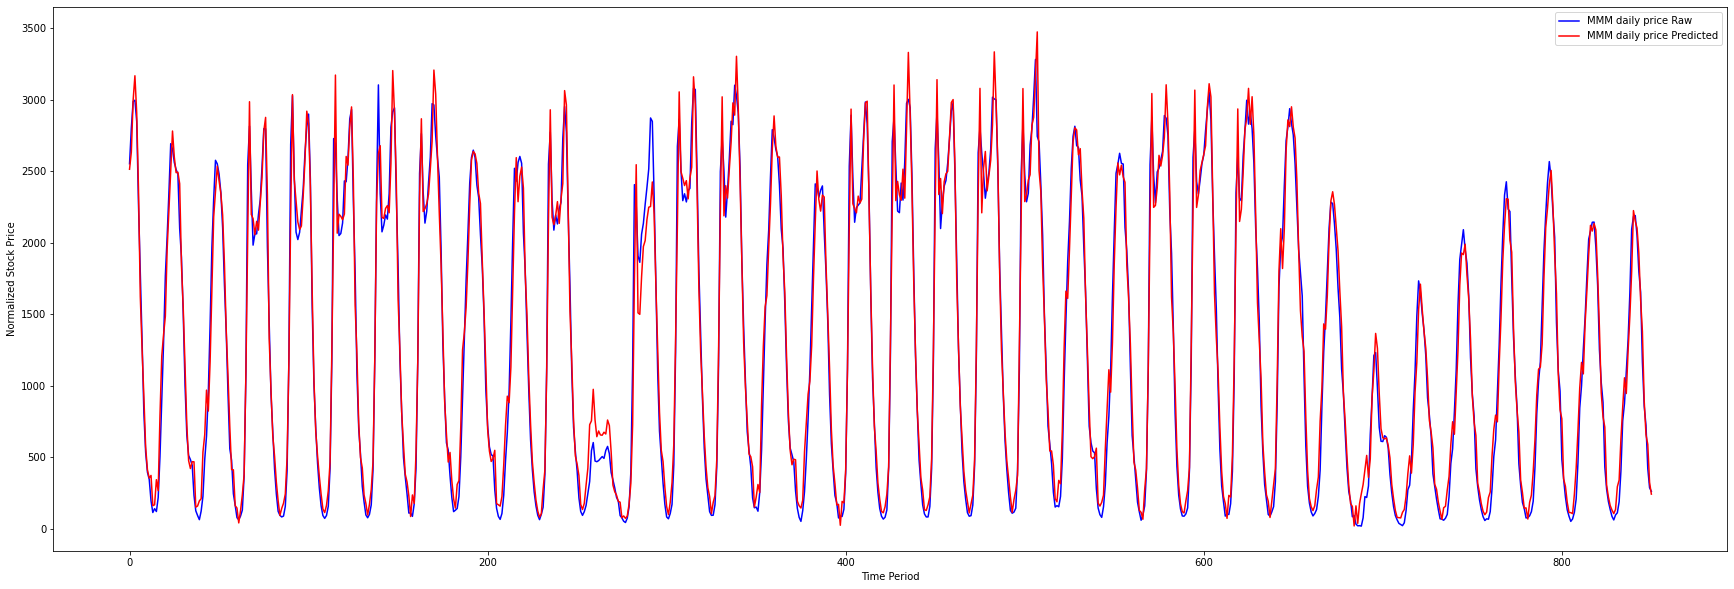

In [ ]:
# Plot predictions
plt.figure(figsize=(30,10))
plt.plot(y_test_unscale[851:1702, :, 0], color='blue', label="MMM daily price Raw")
plt.plot(y_pred_unscale[851:1702, :, 0], color='red', label="MMM daily price Predicted")
plt.xlabel("Time Period")
plt.ylabel("Normalized Stock Price")
plt.legend()
plt.show()

# TCN

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Khoá luận tốt nghiệp/Dataset/final_data_6.csv")
df
# import necesary libraries and modules
from bigdl.orca import init_orca_context, stop_orca_context
from bigdl.orca import OrcaContext
from bigdl.chronos.data import TSDataset
from sklearn.preprocessing import MinMaxScaler
from bigdl.chronos.forecaster.lstm_forecaster import LSTMForecaster
from bigdl.chronos.forecaster.tcn_forecaster import TCNForecaster
from bigdl.orca.automl.metrics import Evaluator
# stop_orca_context()

# recommended to set it to True when running bigdl-chronos in Jupyter notebook 
OrcaContext.log_output = True # (this will display terminal's stdout and stderr in the Jupyter notebook).

init_orca_context(cluster_mode="local", cores=4, init_ray_on_spark=True)


# create list feature
time_ft = ['weekend']
location_ft = ['lat', 'long']
link_ft = ['20223', 'GL1', '1255', '1405', '1404', '1403', 'GL2', '1271','1253', '1401', 'GL3', '1283', '1258', '1256']
weather_ft = ['rhum', 'sun', 'vis']

ft = [
      time_ft, location_ft, link_ft, weather_ft,
      time_ft+location_ft, time_ft+link_ft,  time_ft+weather_ft, location_ft+link_ft, location_ft+weather_ft, link_ft+weather_ft,
      time_ft+location_ft+link_ft, time_ft+location_ft+weather_ft, time_ft+link_ft+weather_ft, location_ft+link_ft+weather_ft,
      time_ft+location_ft+link_ft+weather_ft
    ]

# ft2 = [
#       location_ft, link_ft, weather_ft,
#       location_ft+link_ft, location_ft+weather_ft, link_ft+weather_ft,
#       location_ft+link_ft+weather_ft
#     ]

ft2 = [
      link_ft, location_ft+link_ft+weather_ft,  location_ft+link_ft, link_ft+weather_ft, location_ft, weather_ft, location_ft+weather_ft, 
    ]

len(ft2)


# components to make a evaluate table
dict_scores={}
ft_text = [
      'None', 'time_ft', 'location_ft', 'link_ft', 'weather_ft',
      'time_ft + location_ft', 'time_ft + link_ft',  'time_ft + weather_ft', 'location_ft + link_ft', 'location_ft + weather_ft', 'link_ft + weather_ft',
      'time_ft + location_ft + link_ft', 'time_ft + location_ft + weather_ft', 'time_ft + link_ft + weather_ft', 'location_ft + link_ft + weather_ft',
      'time_ft + location_ft + link_ft + weather_ft']

# ft_text2 = [
#       'None', 'location_ft', 'link_ft', 'weather_ft',
#       'location_ft + link_ft', 'location_ft + weather_ft', 'link_ft + weather_ft',
#       'location_ft + link_ft + weather_ft'
#       ]

ft_text2 = [
      'None', 'link_ft', 'location_ft+link_ft+weather_ft', 'location_ft+link_ft', 'link_ft+weather_ft', 'location_ft', 'weather_ft', 'location_ft+weather_ft' 
      ]

# list_best_config=[]

# EVALUATE with Sklearn metric
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
def s_mape(a, f):
  return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f)))
    # return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)

# rmse = mean_squared_error(y_test_unscale.reshape(-1), y_pred_unscale.reshape(-1), squared=False)
# mae = mean_absolute_error(y_test_unscale.reshape(-1), y_pred_unscale.reshape(-1))
# mape = mean_absolute_percentage_error(y_test_unscale.reshape(-1), y_pred_unscale.reshape(-1))

# print("Kết quả dự đoán trên tập test đã cắt 50 dòng mỗi sensor:")
# print('RMSE:', rmse)
# print('MAE:', mae)
# print('MAPE:', mape)
# print('sMAPE:', smape)

#loop for features
for j in range(1,1000):
  print(" ********* j = " + str(j) + " **********")
  list_rmse=[]
  list_smape=[]
  break_level_2 = False
  for i in range(8):
    if (i == 0):
      tsdata_train, tsdata_val, tsdata_test = TSDataset.from_pandas(df, dt_col="datetime", id_col="id", target_col="value", with_split=True, val_ratio=0.1, test_ratio=0.1)
    else:
      tsdata_train, tsdata_val, tsdata_test = TSDataset.from_pandas(df, dt_col="datetime", id_col="id", target_col="value", extra_feature_col=ft2[i-1] , with_split=True, val_ratio=0.1, test_ratio=0.1)

    
    minmax_scaler = MinMaxScaler()

    for tsdata in [tsdata_train, tsdata_val, tsdata_test]:
        tsdata.scale(minmax_scaler, fit=(tsdata is tsdata_train)).roll(lookback=50, horizon=1)

    X_train, y_train = tsdata_train.to_numpy()
    X_val, y_val = tsdata_val.to_numpy()
    X_test, y_test = tsdata_test.to_numpy()
    X_train.shape, y_train.shape, X_test.shape, y_test.shape

  

    feature_dim = X_train.shape[-1]
    target_dim = 1
    # hidden_dim = 10
    learning_rate = 0.01
    batch_size = 128
    epochs = 3

    # build model
    # forecaster = LSTMForecaster(past_seq_len=X_train.shape[1],
    #                             input_feature_num=feature_dim,
    #                             output_feature_num=target_dim,
    #                             hidden_dim=32,
    #                             lr=learning_rate, layer_num=2, dropout=0.2, 
    #                             seed=17
    #                             )
    forecaster = TCNForecaster(past_seq_len=X_train.shape[1],
                                future_seq_len=1,
                                input_feature_num=feature_dim,
                                output_feature_num=target_dim,
                              num_channels=[32, 32],
                                lr=learning_rate, dropout=0.11,
                              seed=j)

    forecaster.fit(data=(X_train, y_train), batch_size=batch_size, epochs=epochs)

    y_pred = forecaster.predict(X_test)
    y_pred_unscale = tsdata_test.unscale_numpy(y_pred)
    y_test_unscale = tsdata_test.unscale_numpy(y_test)

    # evaluate with mean_squared_error


    rmse =  Evaluator.evaluate("rmse", y_test_unscale, y_pred_unscale, multioutput='raw_values')[0][0]
    # smape =  Evaluator.evaluate("smape", y_test_unscale, y_pred_unscale, multioutput='raw_values')[0][0]
    smape = s_mape(y_test_unscale.reshape(-1), y_pred_unscale.reshape(-1))

    list_rmse.append(rmse)
    list_smape.append(smape)

    if len(list_rmse) >=3:
      if list_rmse[2] > min(list_rmse):
        break_level_2 = True
        print("BREAK !!!!!!")
        break

    print("Diem 1: " + str(break_level_2))
    print(ft_text2[i])
    print("rmse: " + str(rmse) + "\nsmape: " + str(smape))
    print("\n") 
    # print("root mean_squared error is", Evaluator.evaluate(["rmse", "mape"], y_test_unscale, y_pred_unscale, multioutput='raw_values'))
    
    # get best config
    # best_config = auto_estimator.get_best_config()
    # list_best_config.append(best_config)

  # Create evaluate table
  if (break_level_2 == True):
    print("CONTINUE !!!!!!")
    continue
  dict_scores['Extra_feature_col'] = ft_text2
  dict_scores['RMSE Score'] = list_rmse
  dict_scores['sMAPE Score'] = list_smape
  # dict_scores['Best config'] = list_best_config
  evaluate_table = pd.DataFrame.from_dict(dict_scores)
  evaluate_table['seed'] = j
  evaluate_table



/usr/local/lib/python3.7/dist-packages/bigdl/dllib/nncontext.py:377: UserWarning: Setting log_output takes no effect after the context has been initialized. You need to set log_output before initializing the context (e.g., before calling init_orca_context, init_nncontext, etc.)
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/bigdl/orca/common.py:233: Warning: Use an existing SparkContext, cluster_mode is determined by the existing SparkContext
  "cluster_mode is determined by the existing SparkContext", Warning)


Initializing orca context
2022-06-13 16:24:18,472 Thread-3 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2022-06-13 16:24:18,474 Thread-3 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2022-06-13 16:24:18,475 Thread-3 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2022-06-13 16:24:18,476 Thread-3 WARN The bufferSize is set to 4000 but bufferedIo is false: false
22-06-13 16:24:18 [Thread-3] INFO  Engine$:121 - Auto detect executor number and executor cores number
22-06-13 16:24:18 [Thread-3] INFO  Engine$:123 - Executor number is 1 and executor cores number is 4
22-06-13 16:24:18 [Thread-3] INFO  ThreadPool$:95 - Set mkl threads to 1 on thread 16
2022-06-13 16:24:18 WARN  SparkContext:66 - Using an existing SparkContext; some configuration may not take effect.
22-06-13 16:24:18 [Thread-3] INFO  Engine$:446 - Find existing spark context. Checking the spark conf...
 ********* j = 1 **********


Global seed set to 1
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 9.9 K 
1 | loss  | MSELoss         | 0     
------------------------------------------
9.9 K     Trainable params
0         Non-trainable params
9.9 K     Total params
0.040     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 1


Training: -1it [00:00, ?it/s]

Diem 1: False
None
rmse: 133.1601453824347
smape: 0.23615594556653954




Global seed set to 1
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 11.7 K
1 | loss  | MSELoss         | 0     
------------------------------------------
11.7 K    Trainable params
0         Non-trainable params
11.7 K    Total params
0.047     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 1


Training: -1it [00:00, ?it/s]

Diem 1: False
link_ft
rmse: 139.38714335214806
smape: 0.3296527986630088




Global seed set to 1
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 12.4 K
1 | loss  | MSELoss         | 0     
------------------------------------------
12.4 K    Trainable params
0         Non-trainable params
12.4 K    Total params
0.050     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 1


Training: -1it [00:00, ?it/s]

BREAK !!!!!!
CONTINUE !!!!!!
 ********* j = 2 **********


Global seed set to 2
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 9.9 K 
1 | loss  | MSELoss         | 0     
------------------------------------------
9.9 K     Trainable params
0         Non-trainable params
9.9 K     Total params
0.040     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 2


Training: -1it [00:00, ?it/s]

Diem 1: False
None
rmse: 633.1694905238003
smape: 0.6415030924461892




Global seed set to 2
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 11.7 K
1 | loss  | MSELoss         | 0     
------------------------------------------
11.7 K    Trainable params
0         Non-trainable params
11.7 K    Total params
0.047     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 2


Training: -1it [00:00, ?it/s]

Diem 1: False
link_ft
rmse: 151.72967417205072
smape: 0.4408461418028742




Global seed set to 2
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 12.4 K
1 | loss  | MSELoss         | 0     
------------------------------------------
12.4 K    Trainable params
0         Non-trainable params
12.4 K    Total params
0.050     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 2


Training: -1it [00:00, ?it/s]

BREAK !!!!!!
CONTINUE !!!!!!
 ********* j = 3 **********


Global seed set to 3
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 9.9 K 
1 | loss  | MSELoss         | 0     
------------------------------------------
9.9 K     Trainable params
0         Non-trainable params
9.9 K     Total params
0.040     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 3


Training: -1it [00:00, ?it/s]

Diem 1: False
None
rmse: 142.55596130691356
smape: 0.2691492877950764




Global seed set to 3
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 11.7 K
1 | loss  | MSELoss         | 0     
------------------------------------------
11.7 K    Trainable params
0         Non-trainable params
11.7 K    Total params
0.047     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 3


Training: -1it [00:00, ?it/s]

Diem 1: False
link_ft
rmse: 400.23153760883616
smape: 0.5115275382328477




Global seed set to 3
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 12.4 K
1 | loss  | MSELoss         | 0     
------------------------------------------
12.4 K    Trainable params
0         Non-trainable params
12.4 K    Total params
0.050     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 3


Training: -1it [00:00, ?it/s]

BREAK !!!!!!
CONTINUE !!!!!!
 ********* j = 4 **********


Global seed set to 4
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 9.9 K 
1 | loss  | MSELoss         | 0     
------------------------------------------
9.9 K     Trainable params
0         Non-trainable params
9.9 K     Total params
0.040     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 4


Training: -1it [00:00, ?it/s]

Diem 1: False
None
rmse: 139.29928470464736
smape: 0.30359556506687346




Global seed set to 4
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 11.7 K
1 | loss  | MSELoss         | 0     
------------------------------------------
11.7 K    Trainable params
0         Non-trainable params
11.7 K    Total params
0.047     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 4


Training: -1it [00:00, ?it/s]

Diem 1: False
link_ft
rmse: 160.29886042639038
smape: 0.32402179615425475




Global seed set to 4
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 12.4 K
1 | loss  | MSELoss         | 0     
------------------------------------------
12.4 K    Trainable params
0         Non-trainable params
12.4 K    Total params
0.050     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 4


Training: -1it [00:00, ?it/s]

BREAK !!!!!!
CONTINUE !!!!!!
 ********* j = 5 **********


Global seed set to 5
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 9.9 K 
1 | loss  | MSELoss         | 0     
------------------------------------------
9.9 K     Trainable params
0         Non-trainable params
9.9 K     Total params
0.040     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 5


Training: -1it [00:00, ?it/s]

Diem 1: False
None
rmse: 161.8144149648534
smape: 0.28037915101776767




Global seed set to 5
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 11.7 K
1 | loss  | MSELoss         | 0     
------------------------------------------
11.7 K    Trainable params
0         Non-trainable params
11.7 K    Total params
0.047     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 5


Training: -1it [00:00, ?it/s]

Diem 1: False
link_ft
rmse: 423.6908581393597
smape: 0.46020128475275174




Global seed set to 5
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 12.4 K
1 | loss  | MSELoss         | 0     
------------------------------------------
12.4 K    Trainable params
0         Non-trainable params
12.4 K    Total params
0.050     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 5


Training: -1it [00:00, ?it/s]

BREAK !!!!!!
CONTINUE !!!!!!
 ********* j = 6 **********


Global seed set to 6
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 9.9 K 
1 | loss  | MSELoss         | 0     
------------------------------------------
9.9 K     Trainable params
0         Non-trainable params
9.9 K     Total params
0.040     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 6


Training: -1it [00:00, ?it/s]

Diem 1: False
None
rmse: 148.39071448328008
smape: 0.28115975543967




Global seed set to 6
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 11.7 K
1 | loss  | MSELoss         | 0     
------------------------------------------
11.7 K    Trainable params
0         Non-trainable params
11.7 K    Total params
0.047     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 6


Training: -1it [00:00, ?it/s]

Diem 1: False
link_ft
rmse: 219.05350827098886
smape: 0.49427920589715924




Global seed set to 6
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 12.4 K
1 | loss  | MSELoss         | 0     
------------------------------------------
12.4 K    Trainable params
0         Non-trainable params
12.4 K    Total params
0.050     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 6


Training: -1it [00:00, ?it/s]

BREAK !!!!!!
CONTINUE !!!!!!
 ********* j = 7 **********


Global seed set to 7
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 9.9 K 
1 | loss  | MSELoss         | 0     
------------------------------------------
9.9 K     Trainable params
0         Non-trainable params
9.9 K     Total params
0.040     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 7


Training: -1it [00:00, ?it/s]

Diem 1: False
None
rmse: 145.60616098515425
smape: 0.24929498233770894




Global seed set to 7
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 11.7 K
1 | loss  | MSELoss         | 0     
------------------------------------------
11.7 K    Trainable params
0         Non-trainable params
11.7 K    Total params
0.047     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 7


Training: -1it [00:00, ?it/s]

Diem 1: False
link_ft
rmse: 429.58227931659826
smape: 0.5259565977723049




Global seed set to 7
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 12.4 K
1 | loss  | MSELoss         | 0     
------------------------------------------
12.4 K    Trainable params
0         Non-trainable params
12.4 K    Total params
0.050     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 7


Training: -1it [00:00, ?it/s]

BREAK !!!!!!
CONTINUE !!!!!!
 ********* j = 8 **********


Global seed set to 8
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 9.9 K 
1 | loss  | MSELoss         | 0     
------------------------------------------
9.9 K     Trainable params
0         Non-trainable params
9.9 K     Total params
0.040     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 8


Training: -1it [00:00, ?it/s]

Diem 1: False
None
rmse: 293.36493725724716
smape: 0.38045102699561373




Global seed set to 8
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 11.7 K
1 | loss  | MSELoss         | 0     
------------------------------------------
11.7 K    Trainable params
0         Non-trainable params
11.7 K    Total params
0.047     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 8


Training: -1it [00:00, ?it/s]

Diem 1: False
link_ft
rmse: 416.3872218641798
smape: 0.4834328802722312




Global seed set to 8
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 12.4 K
1 | loss  | MSELoss         | 0     
------------------------------------------
12.4 K    Trainable params
0         Non-trainable params
12.4 K    Total params
0.050     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 8


Training: -1it [00:00, ?it/s]

Diem 1: False
location_ft+link_ft+weather_ft
rmse: 145.3252884614032
smape: 0.3402988307663145




Global seed set to 8
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 12.0 K
1 | loss  | MSELoss         | 0     
------------------------------------------
12.0 K    Trainable params
0         Non-trainable params
12.0 K    Total params
0.048     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 8


Training: -1it [00:00, ?it/s]

Diem 1: False
location_ft+link_ft
rmse: 161.74559453841735
smape: 0.375159661652648




Global seed set to 8
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 12.1 K
1 | loss  | MSELoss         | 0     
------------------------------------------
12.1 K    Trainable params
0         Non-trainable params
12.1 K    Total params
0.048     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 8


Training: -1it [00:00, ?it/s]

Diem 1: False
link_ft+weather_ft
rmse: 422.5957645246333
smape: 0.4618508984130684




Global seed set to 8
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 10.2 K
1 | loss  | MSELoss         | 0     
------------------------------------------
10.2 K    Trainable params
0         Non-trainable params
10.2 K    Total params
0.041     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 8


Training: -1it [00:00, ?it/s]

Diem 1: False
location_ft
rmse: 413.1598453807449
smape: 0.4989060830727687




Global seed set to 8
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 10.3 K
1 | loss  | MSELoss         | 0     
------------------------------------------
10.3 K    Trainable params
0         Non-trainable params
10.3 K    Total params
0.041     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 8


Training: -1it [00:00, ?it/s]

Diem 1: False
weather_ft
rmse: 151.64033514955895
smape: 0.28430564721349716




Global seed set to 8
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 10.6 K
1 | loss  | MSELoss         | 0     
------------------------------------------
10.6 K    Trainable params
0         Non-trainable params
10.6 K    Total params
0.042     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 8


Training: -1it [00:00, ?it/s]

Diem 1: False
location_ft+weather_ft
rmse: 955.2161456344737
smape: 0.968319549161485


 ********* j = 9 **********


Global seed set to 9
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 9.9 K 
1 | loss  | MSELoss         | 0     
------------------------------------------
9.9 K     Trainable params
0         Non-trainable params
9.9 K     Total params
0.040     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 9


Training: -1it [00:00, ?it/s]

Diem 1: False
None
rmse: 513.7272743063626
smape: 0.6056871128797143




Global seed set to 9
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 11.7 K
1 | loss  | MSELoss         | 0     
------------------------------------------
11.7 K    Trainable params
0         Non-trainable params
11.7 K    Total params
0.047     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 9


Training: -1it [00:00, ?it/s]

Diem 1: False
link_ft
rmse: 160.56809205300303
smape: 0.4243015067396057




Global seed set to 9
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 12.4 K
1 | loss  | MSELoss         | 0     
------------------------------------------
12.4 K    Trainable params
0         Non-trainable params
12.4 K    Total params
0.050     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 9


Training: -1it [00:00, ?it/s]

BREAK !!!!!!
CONTINUE !!!!!!
 ********* j = 10 **********


Global seed set to 10
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 9.9 K 
1 | loss  | MSELoss         | 0     
------------------------------------------
9.9 K     Trainable params
0         Non-trainable params
9.9 K     Total params
0.040     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 10


Training: -1it [00:00, ?it/s]

Diem 1: False
None
rmse: 405.41077802564666
smape: 0.5393773686816623




Global seed set to 10
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 11.7 K
1 | loss  | MSELoss         | 0     
------------------------------------------
11.7 K    Trainable params
0         Non-trainable params
11.7 K    Total params
0.047     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 10


Training: -1it [00:00, ?it/s]

Diem 1: False
link_ft
rmse: 428.24072038988425
smape: 0.6112314640307196




Global seed set to 10
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 12.4 K
1 | loss  | MSELoss         | 0     
------------------------------------------
12.4 K    Trainable params
0         Non-trainable params
12.4 K    Total params
0.050     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 10


Training: -1it [00:00, ?it/s]

Diem 1: False
location_ft+link_ft+weather_ft
rmse: 140.8327991356377
smape: 0.36774705314444295




Global seed set to 10
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 12.0 K
1 | loss  | MSELoss         | 0     
------------------------------------------
12.0 K    Trainable params
0         Non-trainable params
12.0 K    Total params
0.048     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 10


Training: -1it [00:00, ?it/s]

Diem 1: False
location_ft+link_ft
rmse: 151.5955634772722
smape: 0.43389075672958793




Global seed set to 10
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 12.1 K
1 | loss  | MSELoss         | 0     
------------------------------------------
12.1 K    Trainable params
0         Non-trainable params
12.1 K    Total params
0.048     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 10


Training: -1it [00:00, ?it/s]

Diem 1: False
link_ft+weather_ft
rmse: 146.6614294980425
smape: 0.38209780370593155




Global seed set to 10
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 10.2 K
1 | loss  | MSELoss         | 0     
------------------------------------------
10.2 K    Trainable params
0         Non-trainable params
10.2 K    Total params
0.041     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 10


Training: -1it [00:00, ?it/s]

Diem 1: False
location_ft
rmse: 431.374684444729
smape: 0.4744491522267789




Global seed set to 10
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 10.3 K
1 | loss  | MSELoss         | 0     
------------------------------------------
10.3 K    Trainable params
0         Non-trainable params
10.3 K    Total params
0.041     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 10


Training: -1it [00:00, ?it/s]

Diem 1: False
weather_ft
rmse: 406.39654645284753
smape: 0.49596513327641734




Global seed set to 10
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 10.6 K
1 | loss  | MSELoss         | 0     
------------------------------------------
10.6 K    Trainable params
0         Non-trainable params
10.6 K    Total params
0.042     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 10


Training: -1it [00:00, ?it/s]

Diem 1: False
location_ft+weather_ft
rmse: 152.60734834124509
smape: 0.3948491102737667


 ********* j = 11 **********


Global seed set to 11
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 9.9 K 
1 | loss  | MSELoss         | 0     
------------------------------------------
9.9 K     Trainable params
0         Non-trainable params
9.9 K     Total params
0.040     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 11


Training: -1it [00:00, ?it/s]

Diem 1: False
None
rmse: 370.52539478706797
smape: 0.47253609928685325




Global seed set to 11
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 11.7 K
1 | loss  | MSELoss         | 0     
------------------------------------------
11.7 K    Trainable params
0         Non-trainable params
11.7 K    Total params
0.047     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 11


Training: -1it [00:00, ?it/s]

Diem 1: False
link_ft
rmse: 402.98154702062004
smape: 0.5114132835690292




Global seed set to 11
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 12.4 K
1 | loss  | MSELoss         | 0     
------------------------------------------
12.4 K    Trainable params
0         Non-trainable params
12.4 K    Total params
0.050     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 11


Training: -1it [00:00, ?it/s]

Diem 1: False
location_ft+link_ft+weather_ft
rmse: 288.1878760019607
smape: 0.36264588297089884




Global seed set to 11
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 12.0 K
1 | loss  | MSELoss         | 0     
------------------------------------------
12.0 K    Trainable params
0         Non-trainable params
12.0 K    Total params
0.048     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 11


Training: -1it [00:00, ?it/s]

BREAK !!!!!!
CONTINUE !!!!!!
 ********* j = 12 **********


Global seed set to 12
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 9.9 K 
1 | loss  | MSELoss         | 0     
------------------------------------------
9.9 K     Trainable params
0         Non-trainable params
9.9 K     Total params
0.040     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 12


Training: -1it [00:00, ?it/s]

Diem 1: False
None
rmse: 140.03084586370932
smape: 0.30929338822223107




Global seed set to 12
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 11.7 K
1 | loss  | MSELoss         | 0     
------------------------------------------
11.7 K    Trainable params
0         Non-trainable params
11.7 K    Total params
0.047     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 12


Training: -1it [00:00, ?it/s]

Diem 1: False
link_ft
rmse: 148.09434323048276
smape: 0.3765627820235651




Global seed set to 12
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 12.4 K
1 | loss  | MSELoss         | 0     
------------------------------------------
12.4 K    Trainable params
0         Non-trainable params
12.4 K    Total params
0.050     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 12


Training: -1it [00:00, ?it/s]

BREAK !!!!!!
CONTINUE !!!!!!
 ********* j = 13 **********


Global seed set to 13
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 9.9 K 
1 | loss  | MSELoss         | 0     
------------------------------------------
9.9 K     Trainable params
0         Non-trainable params
9.9 K     Total params
0.040     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 13


Training: -1it [00:00, ?it/s]

Diem 1: False
None
rmse: 141.10087762261594
smape: 0.38191960248911194




Global seed set to 13
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 11.7 K
1 | loss  | MSELoss         | 0     
------------------------------------------
11.7 K    Trainable params
0         Non-trainable params
11.7 K    Total params
0.047     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 13


Training: -1it [00:00, ?it/s]

Diem 1: False
link_ft
rmse: 453.14295406212403
smape: 0.5328625196131392




Global seed set to 13
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 12.4 K
1 | loss  | MSELoss         | 0     
------------------------------------------
12.4 K    Trainable params
0         Non-trainable params
12.4 K    Total params
0.050     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 13


Training: -1it [00:00, ?it/s]

BREAK !!!!!!
CONTINUE !!!!!!
 ********* j = 14 **********


Global seed set to 14
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 9.9 K 
1 | loss  | MSELoss         | 0     
------------------------------------------
9.9 K     Trainable params
0         Non-trainable params
9.9 K     Total params
0.040     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 14


Training: -1it [00:00, ?it/s]

Diem 1: False
None
rmse: 144.46223260567453
smape: 0.2997928600615641




Global seed set to 14
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 11.7 K
1 | loss  | MSELoss         | 0     
------------------------------------------
11.7 K    Trainable params
0         Non-trainable params
11.7 K    Total params
0.047     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 14


Training: -1it [00:00, ?it/s]

Diem 1: False
link_ft
rmse: 427.6531987571983
smape: 0.48821468296503884




Global seed set to 14
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 12.4 K
1 | loss  | MSELoss         | 0     
------------------------------------------
12.4 K    Trainable params
0         Non-trainable params
12.4 K    Total params
0.050     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 14


Training: -1it [00:00, ?it/s]

BREAK !!!!!!
CONTINUE !!!!!!
 ********* j = 15 **********


Global seed set to 15
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 9.9 K 
1 | loss  | MSELoss         | 0     
------------------------------------------
9.9 K     Trainable params
0         Non-trainable params
9.9 K     Total params
0.040     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 15


Training: -1it [00:00, ?it/s]

Diem 1: False
None
rmse: 140.671179912424
smape: 0.26924834700020933




Global seed set to 15
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 11.7 K
1 | loss  | MSELoss         | 0     
------------------------------------------
11.7 K    Trainable params
0         Non-trainable params
11.7 K    Total params
0.047     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 15


Training: -1it [00:00, ?it/s]

Diem 1: False
link_ft
rmse: 179.3912257571884
smape: 0.5508623985862067




Global seed set to 15
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 12.4 K
1 | loss  | MSELoss         | 0     
------------------------------------------
12.4 K    Trainable params
0         Non-trainable params
12.4 K    Total params
0.050     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 15


Training: -1it [00:00, ?it/s]

BREAK !!!!!!
CONTINUE !!!!!!
 ********* j = 16 **********


Global seed set to 16
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 9.9 K 
1 | loss  | MSELoss         | 0     
------------------------------------------
9.9 K     Trainable params
0         Non-trainable params
9.9 K     Total params
0.040     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 16


Training: -1it [00:00, ?it/s]

Diem 1: False
None
rmse: 398.5365041729708
smape: 0.47289280329903394




Global seed set to 16
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 11.7 K
1 | loss  | MSELoss         | 0     
------------------------------------------
11.7 K    Trainable params
0         Non-trainable params
11.7 K    Total params
0.047     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 16


Training: -1it [00:00, ?it/s]

Diem 1: False
link_ft
rmse: 144.80886069499107
smape: 0.30581832241617474




Global seed set to 16
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 12.4 K
1 | loss  | MSELoss         | 0     
------------------------------------------
12.4 K    Trainable params
0         Non-trainable params
12.4 K    Total params
0.050     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 16


Training: -1it [00:00, ?it/s]

Diem 1: False
location_ft+link_ft+weather_ft
rmse: 138.47908028502798
smape: 0.3247538007081727




Global seed set to 16
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 12.0 K
1 | loss  | MSELoss         | 0     
------------------------------------------
12.0 K    Trainable params
0         Non-trainable params
12.0 K    Total params
0.048     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 16


Training: -1it [00:00, ?it/s]

Diem 1: False
location_ft+link_ft
rmse: 164.8938720347781
smape: 0.36972946546077196




Global seed set to 16
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 12.1 K
1 | loss  | MSELoss         | 0     
------------------------------------------
12.1 K    Trainable params
0         Non-trainable params
12.1 K    Total params
0.048     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 16


Training: -1it [00:00, ?it/s]

Diem 1: False
link_ft+weather_ft
rmse: 141.25458058016466
smape: 0.3287962485670721




Global seed set to 16
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 10.2 K
1 | loss  | MSELoss         | 0     
------------------------------------------
10.2 K    Trainable params
0         Non-trainable params
10.2 K    Total params
0.041     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 16


Training: -1it [00:00, ?it/s]

Diem 1: False
location_ft
rmse: 416.2674051333274
smape: 0.5192121269559759




Global seed set to 16
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 10.3 K
1 | loss  | MSELoss         | 0     
------------------------------------------
10.3 K    Trainable params
0         Non-trainable params
10.3 K    Total params
0.041     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 16


Training: -1it [00:00, ?it/s]

Diem 1: False
weather_ft
rmse: 143.28842755104557
smape: 0.35710745875890076




Global seed set to 16
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 10.6 K
1 | loss  | MSELoss         | 0     
------------------------------------------
10.6 K    Trainable params
0         Non-trainable params
10.6 K    Total params
0.042     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 16


Training: -1it [00:00, ?it/s]

Diem 1: False
location_ft+weather_ft
rmse: 140.51817007667094
smape: 0.30161186745418733


 ********* j = 17 **********


Global seed set to 17
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 9.9 K 
1 | loss  | MSELoss         | 0     
------------------------------------------
9.9 K     Trainable params
0         Non-trainable params
9.9 K     Total params
0.040     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 17


Training: -1it [00:00, ?it/s]

Diem 1: False
None
rmse: 356.5635371754192
smape: 0.481175132285171




Global seed set to 17
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 11.7 K
1 | loss  | MSELoss         | 0     
------------------------------------------
11.7 K    Trainable params
0         Non-trainable params
11.7 K    Total params
0.047     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 17


Training: -1it [00:00, ?it/s]

Diem 1: False
link_ft
rmse: 957.3570142110719
smape: 0.9688388527946593




Global seed set to 17
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 12.4 K
1 | loss  | MSELoss         | 0     
------------------------------------------
12.4 K    Trainable params
0         Non-trainable params
12.4 K    Total params
0.050     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 17


Training: -1it [00:00, ?it/s]

Diem 1: False
location_ft+link_ft+weather_ft
rmse: 166.60665979006578
smape: 0.4194586486967715




Global seed set to 17
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 12.0 K
1 | loss  | MSELoss         | 0     
------------------------------------------
12.0 K    Trainable params
0         Non-trainable params
12.0 K    Total params
0.048     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 17


Training: -1it [00:00, ?it/s]

Diem 1: False
location_ft+link_ft
rmse: 401.6102764183824
smape: 0.6522583793721644




Global seed set to 17
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 12.1 K
1 | loss  | MSELoss         | 0     
------------------------------------------
12.1 K    Trainable params
0         Non-trainable params
12.1 K    Total params
0.048     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 17


Training: -1it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1047: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Khoá luận tốt nghiệp/Dataset/final_data_6.csv")
df
# import necesary libraries and modules
from bigdl.orca import init_orca_context, stop_orca_context
from bigdl.orca import OrcaContext
from bigdl.chronos.data import TSDataset
from sklearn.preprocessing import MinMaxScaler
from bigdl.chronos.forecaster.lstm_forecaster import LSTMForecaster
from bigdl.orca.automl.metrics import Evaluator
# stop_orca_context()

# recommended to set it to True when running bigdl-chronos in Jupyter notebook 
OrcaContext.log_output = True # (this will display terminal's stdout and stderr in the Jupyter notebook).

init_orca_context(cluster_mode="local", cores=4, init_ray_on_spark=True)


# create list feature
time_ft = ['weekend']
location_ft = ['lat', 'long']
link_ft = ['20223', 'GL1', '1255', '1405', '1404', '1403', 'GL2', '1271','1253', '1401', 'GL3', '1283', '1258', '1256']
weather_ft = ['rhum', 'sun', 'vis']


# components to make a evaluate table
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
def s_mape(a, f):
  return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f)))

#loop for features

tsdata_train, tsdata_val, tsdata_test = TSDataset.from_pandas(df, dt_col="datetime", id_col="id", target_col="value", extra_feature_col=location_ft+link_ft+weather_ft , with_split=True, val_ratio=0.1, test_ratio=0.1)


minmax_scaler = MinMaxScaler()

for tsdata in [tsdata_train, tsdata_val, tsdata_test]:
    tsdata.scale(minmax_scaler, fit=(tsdata is tsdata_train)).roll(lookback=50, horizon=1)

X_train, y_train = tsdata_train.to_numpy()
X_val, y_val = tsdata_val.to_numpy()
X_test, y_test = tsdata_test.to_numpy()
X_train.shape, y_train.shape, X_test.shape, y_test.shape



feature_dim = X_train.shape[-1]
target_dim = 1
# hidden_dim = 10
learning_rate = 0.01
batch_size = 128
epochs = 3

# build model
forecaster = TCNForecaster(past_seq_len=X_train.shape[1],
                                future_seq_len=1,
                                input_feature_num=feature_dim,
                                output_feature_num=target_dim,
                              num_channels=[32, 32],
                                lr=learning_rate, dropout=0.11,
                              seed=16)

forecaster.fit(data=(X_train, y_train), batch_size=batch_size, epochs=epochs)

y_pred = forecaster.predict(X_test)
y_pred_unscale = tsdata_test.unscale_numpy(y_pred)
y_test_unscale = tsdata_test.unscale_numpy(y_test)

rmse =  Evaluator.evaluate("rmse", y_test_unscale, y_pred_unscale, multioutput='raw_values')[0][0]
# smape =  Evaluator.evaluate("smape", y_test_unscale, y_pred_unscale, multioutput='raw_values')[0][0]
smape = s_mape(y_test_unscale.reshape(-1), y_pred_unscale.reshape(-1))
print("Current - rmse: " + str(rmse) + "\tsmape: " + str(smape))

/usr/local/lib/python3.7/dist-packages/bigdl/dllib/nncontext.py:377: UserWarning: Setting log_output takes no effect after the context has been initialized. You need to set log_output before initializing the context (e.g., before calling init_orca_context, init_nncontext, etc.)
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/bigdl/orca/common.py:233: Warning: Use an existing SparkContext, cluster_mode is determined by the existing SparkContext
  "cluster_mode is determined by the existing SparkContext", Warning)


Initializing orca context
2022-06-13 17:25:11,273 Thread-3 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2022-06-13 17:25:11,274 Thread-3 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2022-06-13 17:25:11,275 Thread-3 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2022-06-13 17:25:11,276 Thread-3 WARN The bufferSize is set to 4000 but bufferedIo is false: false
22-06-13 17:25:11 [Thread-3] INFO  Engine$:121 - Auto detect executor number and executor cores number
22-06-13 17:25:11 [Thread-3] INFO  Engine$:123 - Executor number is 1 and executor cores number is 4
22-06-13 17:25:11 [Thread-3] INFO  ThreadPool$:95 - Set mkl threads to 1 on thread 16
2022-06-13 17:25:11 WARN  SparkContext:66 - Using an existing SparkContext; some configuration may not take effect.
22-06-13 17:25:11 [Thread-3] INFO  Engine$:446 - Find existing spark context. Checking the spark conf...


Global seed set to 16
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type            | Params
------------------------------------------
0 | model | TemporalConvNet | 12.4 K
1 | loss  | MSELoss         | 0     
------------------------------------------
12.4 K    Trainable params
0         Non-trainable params
12.4 K    Total params
0.050     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 16


Training: -1it [00:00, ?it/s]

Current - rmse: 138.99856853996468	smape: 0.30822781326196624


In [ ]:
df_test = tsdata_test.unscale().to_pandas()

In [ ]:
df_test

,id,datetime,value,irain,rain,itemp,temp,iwb,wetb,dewpt,...,1401,GL3,1283,1258,1256,weekday,weekend,lat,long,holiday
173448,000000001253A,2021-11-25 12:00:00,3110.0,0,0.0,0,5.4,0,4.0,2.0,...,1.0,0.0,0.0,0.0,0.0,3,0,51.87488,-8.44783,0
173470,000000001253A,2021-11-25 13:00:00,3151.0,0,0.0,0,5.8,0,4.3,2.0,...,1.0,0.0,0.0,0.0,0.0,3,0,51.87488,-8.44783,0
173492,000000001253A,2021-11-25 14:00:00,3067.0,0,0.0,0,6.1,0,4.3,1.6,...,1.0,0.0,0.0,0.0,0.0,3,0,51.87488,-8.44783,0
173514,000000001253A,2021-11-25 15:00:00,3491.0,0,0.0,0,6.0,0,4.3,1.9,...,1.0,0.0,0.0,0.0,0.0,3,0,51.87488,-8.44783,0
173536,000000001253A,2021-11-25 16:00:00,3594.0,0,0.0,0,5.5,0,3.9,1.5,...,1.0,0.0,0.0,0.0,0.0,3,0,51.87488,-8.44783,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192631,000000020223B,2021-12-31 19:00:00,210.0,0,0.4,0,11.6,0,11.6,11.5,...,0.0,0.0,0.0,0.0,0.0,4,0,51.88714,-8.56911,0
192653,000000020223B,2021-12-31 20:00:00,139.0,0,0.3,0,11.6,0,11.5,11.4,...,0.0,0.0,0.0,0.0,0.0,4,0,51.88714,-8.56911,0
192675,000000020223B,2021-12-31 21:00:00,69.0,2,0.0,0,11.4,0,11.2,11.1,...,0.0,0.0,0.0,0.0,0.0,4,0,51.88714,-8.56911,0
192697,000000020223B,2021-12-31 22:00:00,52.0,2,0.0,0,11.1,0,10.9,10.8,...,0.0,0.0,0.0,0.0,0.0,4,0,51.88714,-8.56911,0


In [ ]:
list_id = ['000000001253A',
 '000000001253B',
 '000000001255A',
 '000000001255B',
 '000000001256A',
 '000000001256B',
 '000000001258A',
 '000000001258B',
 '000000001271A',
 '000000001271B',
 '000000001283A',
 '000000001283B',
 '000000001401A',
 '000000001401B',
 '000000001403A',
 '000000001403B',
 '000000001404A',
 '000000001404B',
 '000000001405A',
 '000000001405B',
 '000000020223A',
 '000000020223B']
result = pd.DataFrame()
for i in list_id:
  df_filter = df_test[df_test['id'] == i].iloc[50:,:]
  result = pd.concat([result, df_filter])

y_hat = y_pred_unscale.reshape(-1)
result['pred'] = y_hat
result

,id,datetime,value,irain,rain,itemp,temp,iwb,wetb,dewpt,...,GL3,1283,1258,1256,weekday,weekend,lat,long,holiday,pred
174548,000000001253A,2021-11-27 14:00:00,3395.0,0,0.0,0,5.1,0,2.7,-1.5,...,0.0,0.0,0.0,0.0,5,1,51.87488,-8.44783,0,3301.933838
174570,000000001253A,2021-11-27 15:00:00,3174.0,0,0.0,0,4.7,0,2.5,-1.4,...,0.0,0.0,0.0,0.0,5,1,51.87488,-8.44783,0,3078.105713
174592,000000001253A,2021-11-27 16:00:00,3312.0,0,0.0,0,4.2,0,2.3,-1.0,...,0.0,0.0,0.0,0.0,5,1,51.87488,-8.44783,0,2837.079102
174614,000000001253A,2021-11-27 17:00:00,2785.0,0,0.0,0,3.5,0,1.9,-1.0,...,0.0,0.0,0.0,0.0,5,1,51.87488,-8.44783,0,3000.459961
174636,000000001253A,2021-11-27 18:00:00,2225.0,3,0.0,0,3.0,0,1.5,-1.3,...,0.0,0.0,0.0,0.0,5,1,51.87488,-8.44783,0,2638.249756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192631,000000020223B,2021-12-31 19:00:00,210.0,0,0.4,0,11.6,0,11.6,11.5,...,0.0,0.0,0.0,0.0,4,0,51.88714,-8.56911,0,204.818680
192653,000000020223B,2021-12-31 20:00:00,139.0,0,0.3,0,11.6,0,11.5,11.4,...,0.0,0.0,0.0,0.0,4,0,51.88714,-8.56911,0,187.332565
192675,000000020223B,2021-12-31 21:00:00,69.0,2,0.0,0,11.4,0,11.2,11.1,...,0.0,0.0,0.0,0.0,4,0,51.88714,-8.56911,0,118.883629
192697,000000020223B,2021-12-31 22:00:00,52.0,2,0.0,0,11.1,0,10.9,10.8,...,0.0,0.0,0.0,0.0,4,0,51.88714,-8.56911,0,49.383427


In [ ]:
rmse = mean_squared_error(result['value'], result['pred'], squared=False)
rmse

138.99856882357264

In [ ]:
result.to_csv("Result_Forecaster_TCN.csv", index=False)

In [ ]:
!mv Result_Forecaster_TCN.csv "/content/drive/MyDrive/Khoá luận tốt nghiệp/Notebook/Notebook Model/Compare Model"